In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import dataframe dan menampilkannya
df = pd.DataFrame(data=pd.read_csv('kidney_disease_train.csv'))
display(df)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


In [ ]:
# remove id
df.drop('id', axis = 1, inplace = True)
# rename nama column
colName = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']
df.columns = colName

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      275 non-null    float64
 1   blood_pressure           271 non-null    float64
 2   specific_gravity         244 non-null    float64
 3   albumin                  245 non-null    float64
 4   sugar                    242 non-null    float64
 5   red_blood_cells          173 non-null    object 
 6   pus_cell                 230 non-null    object 
 7   pus_cell_clumps          276 non-null    object 
 8   bacteria                 276 non-null    object 
 9   blood_glucose_random     247 non-null    float64
 10  blood_urea               266 non-null    float64
 11  serum_creatinine         268 non-null    float64
 12  sodium                   213 non-null    float64
 13  potassium                212 non-null    float64
 14  haemoglobin              2

In [ ]:
#  merubah tipe data menjadi numeric jika bukan string
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
# Extracting categorical and numerical columns

# categorical = nominal
# numerical = ordinal

cat_cols = [col for col in df.columns if df[col].dtype == 'object' ]
num_cols = [col for col in df.columns if df[col].dtype != 'object' ]
# looking 4 unique values
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")



red_blood_cells has ['normal' nan 'abnormal'] values

pus_cell has ['abnormal' nan 'normal'] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' '\tyes' '\tno' nan] values

coronary_artery_disease has ['no' 'yes' nan '\tno'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

anemia has ['no' 'yes'] values

class has ['ckd' 'notckd'] values



In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# merubah nilai menjadi binary
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})
df['class'] = pd.to_numeric(df['class'], errors='coerce')


In [ ]:
# jumlah nan pada categorical column
print('jumlah null pada nominal column')
print(
df[cat_cols].isna().sum().sort_values(ascending = False))

print('\n\n')
# jumlah null pada ordinal column
print('jumlah null pada ordinal column')
print(
df[num_cols].isna().sum().sort_values(ascending = False)
)


jumlah null pada nominal column
red_blood_cells            107
pus_cell                    50
pus_cell_clumps              4
bacteria                     4
hypertension                 1
diabetes_mellitus            1
coronary_artery_disease      1
appetite                     0
peda_edema                   0
anemia                       0
class                        0
dtype: int64



jumlah null pada ordinal column
red_blood_cell_count      94
white_blood_cell_count    78
potassium                 68
sodium                    67
packed_cell_volume        51
haemoglobin               39
sugar                     38
specific_gravity          36
albumin                   35
blood_glucose_random      33
blood_urea                14
serum_creatinine          12
blood_pressure             9
age                        5
dtype: int64


**Proses handle data untuk data dengan metode Erase**

---



In [ ]:
# mengcopy data untuk metode yang berberda
dfErase = df.copy()

# menghapus column data yang nilai nan nya lebih besar dari 50
for col in dfErase:
    if dfErase[col].isna().sum() > 50:
        dfErase.drop(col, axis=1, inplace=True),
# Extracting categorical and numerical columns
# categorical = nominal
# numerical = ordinal

cat_colsErase = [col for col in dfErase.columns if dfErase[col].dtype == 'object' ]
num_colsErase = [col for col in dfErase.columns if dfErase[col].dtype != 'object' ]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# hapus row data nan yang kecil
dfErase = dfErase.dropna(subset=cat_colsErase)

In [ ]:
# checking for nan values  pada categorical column
print('jumlah nan pada nominal column')
print(
dfErase[cat_colsErase].isna().sum().sort_values(ascending = False),'\n',
)
print('\n\n')
# jumlah nan pada ordinal column
print('jumlah nan pada ordinal column')
print(
dfErase[num_colsErase].isna().sum().sort_values(ascending = False),'\n',
)

jumlah nan pada nominal column
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
dtype: int64 




jumlah nan pada ordinal column
haemoglobin             27
blood_glucose_random    25
blood_urea              10
serum_creatinine        10
blood_pressure           4
age                      3
sugar                    3
specific_gravity         2
albumin                  2
class                    0
dtype: int64 



In [ ]:
# mengisi value nan pada ordinal data dengan modus nilai data
def impute_mode_test_erase(feature):
    mode = dfErase[feature].mode()[0]
    dfErase[feature] = dfErase[feature].fillna(mode)
def impute_mode_test(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

for col in dfErase[num_colsErase]:
    impute_mode_test_erase(col)

for col in df[num_cols]:
    impute_mode_test(col)

In [ ]:
# jumlah nan pada ordinal column
print('jumlah nan pada ordinal column')
print(
dfErase[num_colsErase].isna().sum().sort_values(ascending = False),'\n',
)

jumlah nan pada ordinal column
age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
haemoglobin             0
class                   0
dtype: int64 



removing outlier

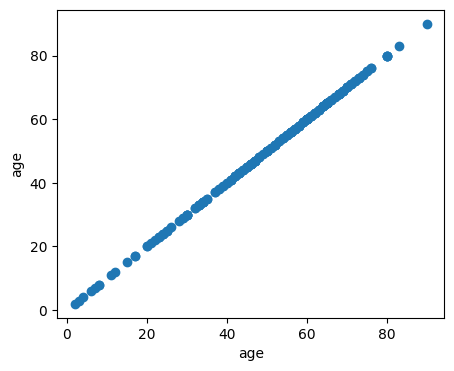

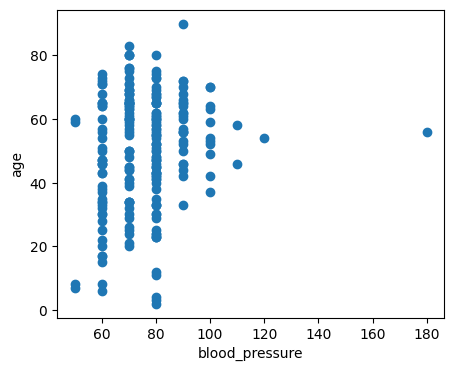

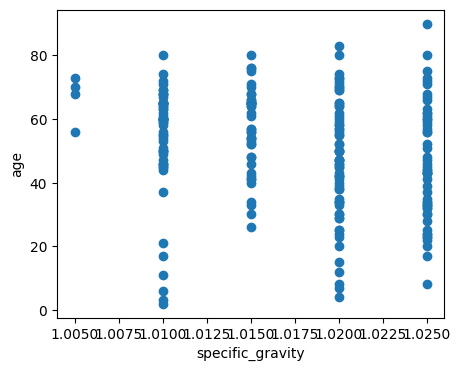

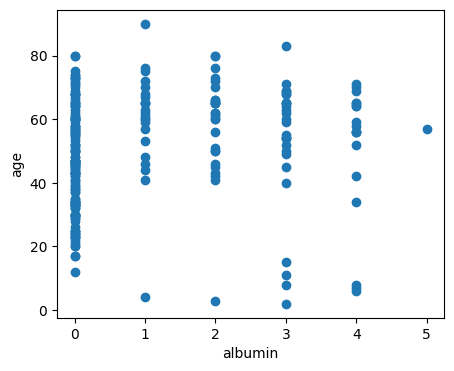

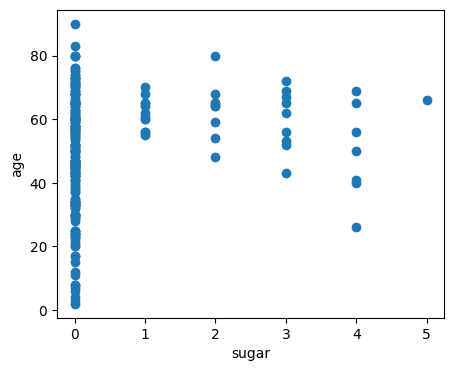

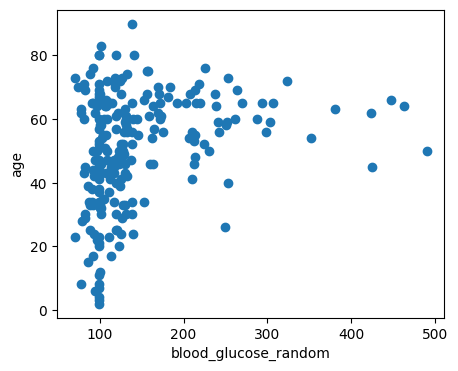

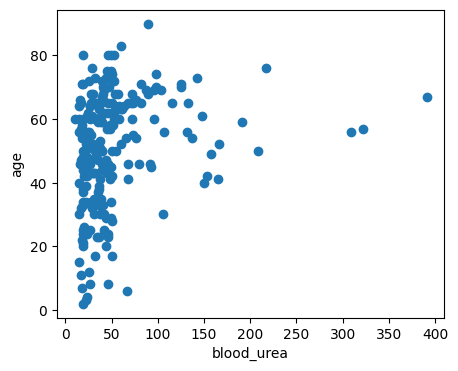

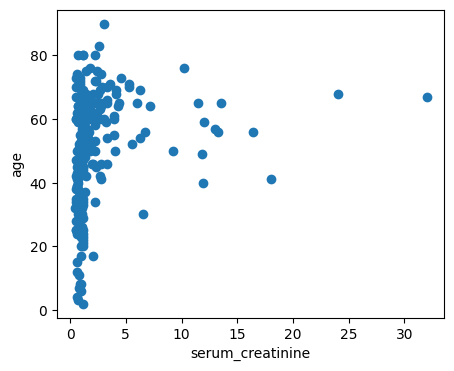

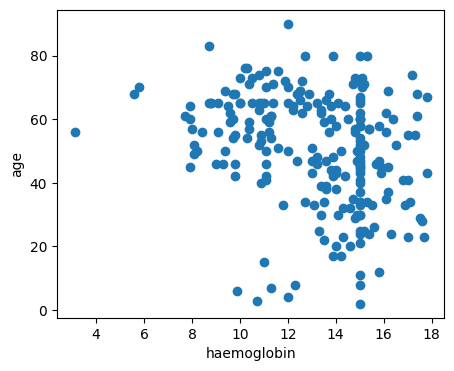

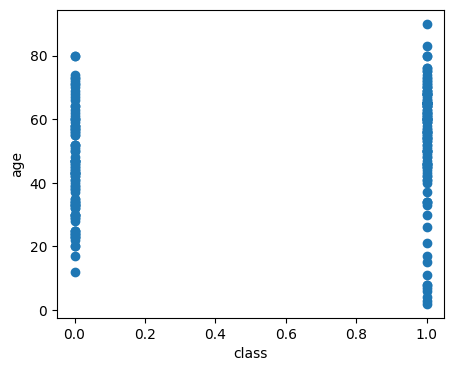

In [ ]:
for col in num_colsErase:
  fig, ax = plt.subplots(figsize=(5, 4))
  ax.scatter(dfErase[col],dfErase['age'])
  ax.set_xlabel(col)
  ax.set_ylabel('age')
plt.show()



In [ ]:
# mendata value fitur outlier
conditions = [
    ["haemoglobin", "<", 4],
    ["serum_creatinine", ">", 24],
    ["blood_urea", ">", 300],
    ["blood_pressure", ">", 170]
]
# dipake untuk menampung outlier
df_filtered = pd.DataFrame()
display (df_filtered)
for col in conditions:
  attribute, operator, threshold = col
  if operator == ">":
        df_temp = dfErase.loc[dfErase[attribute] > threshold]
  elif operator == "<":
        df_temp = dfErase.loc[dfErase[attribute] < threshold]
  df_filtered = df_filtered.append(df_temp, ignore_index=True)
# hasil outliernya dicocokan dan dihapus
dfErase = pd.merge(dfErase,df_filtered, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)


""


<ipython-input-36-ab10a00a91c7>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df_temp, ignore_index=True)


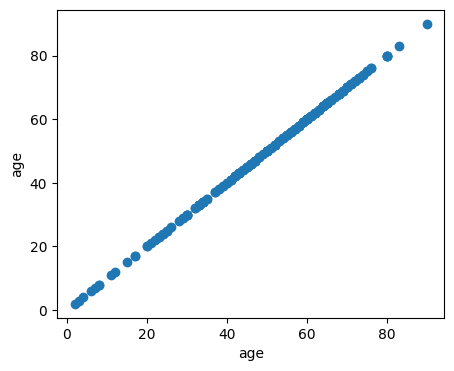

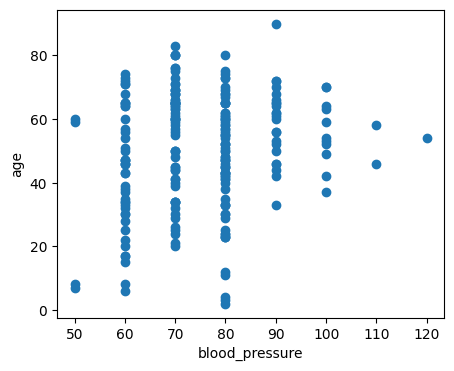

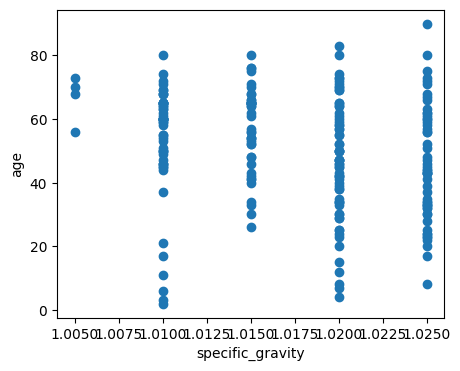

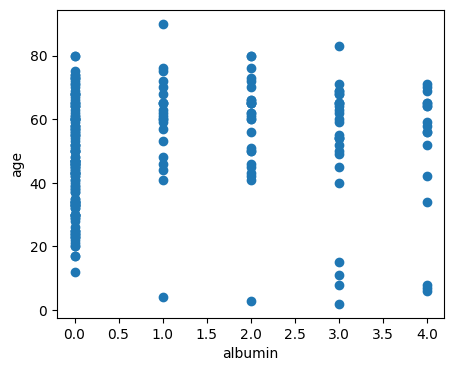

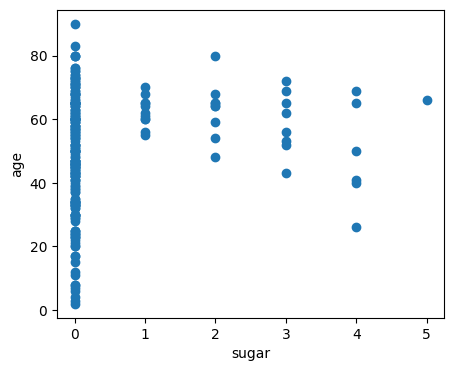

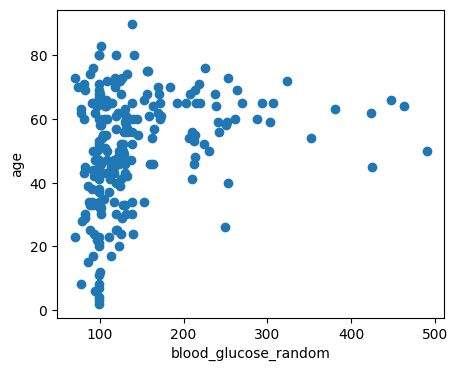

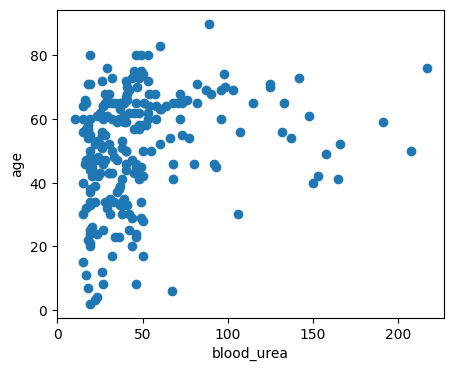

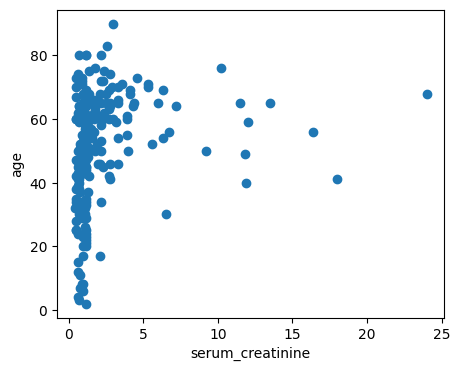

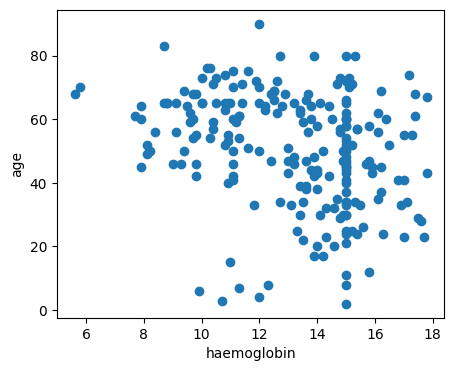

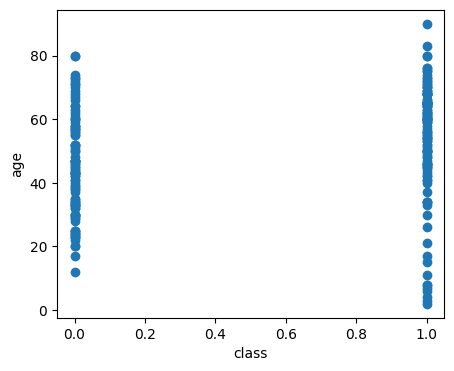

In [ ]:
for col in num_colsErase:

  fig, ax = plt.subplots(figsize=(5, 4))
  ax.scatter(dfErase[col],dfErase['age'])
  ax.set_xlabel(col)
  ax.set_ylabel('age')
plt.show()


In [ ]:
# data yang sudah bersih
display(dfErase)
display(df)

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,62.0,70.0,1.025,3.0,0.0,abnormal,notpresent,notpresent,122.0,42.0,1.7,12.6,yes,yes,no,good,no,no,1
1,43.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,108.0,25.0,1.0,17.8,no,no,no,good,no,no,0
2,42.0,100.0,1.015,4.0,0.0,abnormal,notpresent,present,99.0,50.0,1.4,11.1,yes,no,no,poor,no,no,1
3,60.0,50.0,1.010,0.0,0.0,normal,notpresent,notpresent,261.0,58.0,2.2,15.0,yes,no,no,good,no,no,1
4,29.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,83.0,49.0,0.9,17.5,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,61.0,80.0,1.015,2.0,0.0,abnormal,notpresent,notpresent,173.0,148.0,3.9,7.7,yes,yes,yes,poor,yes,yes,1
224,46.0,60.0,1.010,1.0,0.0,normal,notpresent,notpresent,163.0,92.0,3.3,9.8,yes,yes,no,good,no,no,1
225,23.0,80.0,1.025,0.0,0.0,normal,notpresent,notpresent,111.0,34.0,1.1,14.3,no,no,no,good,no,no,0
226,38.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,99.0,19.0,0.5,13.6,no,no,no,good,no,no,0


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39.0,7900.0,3.9,yes,yes,no,good,no,no,1
1,54.0,70.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,233.0,...,52.0,6700.0,4.5,no,yes,no,good,no,no,1
2,47.0,80.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,114.0,...,52.0,6700.0,4.5,yes,no,no,poor,no,no,1
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43.0,7200.0,5.5,no,no,no,good,no,no,0
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,99.0,...,39.0,8300.0,4.6,yes,no,no,poor,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,1
276,50.0,90.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,89.0,...,17.0,6500.0,4.5,yes,yes,no,good,yes,yes,1
277,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,...,41.0,7200.0,5.0,no,no,no,good,no,no,0
278,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,44.0,7300.0,6.4,no,no,no,good,no,no,0


# labeling dan proses minmax (normalisasi)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# normalisasi data menggunakan label encoder
le = LabelEncoder()
scaler = MinMaxScaler()

#DataFrameErase
for col in cat_colsErase:
    dfErase[col] = le.fit_transform(dfErase[col])

for col in num_colsErase:
  if col == 'class' :
    continue
  else:
    model = scaler.fit(dfErase[[col]])
    dfErase[col] = model.transform(dfErase[[col]])


#DataFrameNotErase
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

for col in num_cols:
  if col == 'class' :
    continue
  else:
    modelne = scaler.fit(df[[col]])
    df[col] = modelne.transform(df[[col]])
display(dfErase)
display(df)

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0.681818,0.285714,1.00,0.75,0.0,0,0,0,0.123810,0.154589,0.055085,0.573770,1,1,0,0,0,0,1
1,0.465909,0.142857,1.00,0.00,0.0,1,0,0,0.090476,0.072464,0.025424,1.000000,0,0,0,0,0,0,0
2,0.454545,0.714286,0.50,1.00,0.0,0,0,1,0.069048,0.193237,0.042373,0.450820,1,0,0,1,0,0,1
3,0.659091,0.000000,0.25,0.00,0.0,1,0,0,0.454762,0.231884,0.076271,0.770492,1,0,0,0,0,0,1
4,0.306818,0.428571,0.75,0.00,0.0,1,0,0,0.030952,0.188406,0.021186,0.975410,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.670455,0.428571,0.50,0.50,0.0,0,0,0,0.245238,0.666667,0.148305,0.172131,1,1,1,1,1,1,1
224,0.500000,0.142857,0.25,0.25,0.0,1,0,0,0.221429,0.396135,0.122881,0.344262,1,1,0,0,0,0,1
225,0.238636,0.428571,1.00,0.00,0.0,1,0,0,0.097619,0.115942,0.029661,0.713115,0,0,0,0,0,0,0
226,0.409091,0.428571,0.75,0.00,0.0,1,0,0,0.069048,0.043478,0.004237,0.655738,0,0,0,0,0,0,0


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0.681818,0.153846,1.00,0.6,0.0,1,0,0,0,0.123810,...,0.666667,0.235537,0.305085,1,1,0,0,0,0,1
1,0.590909,0.153846,0.75,0.0,0.0,2,2,0,0,0.388095,...,0.955556,0.185950,0.406780,0,1,0,0,0,0,1
2,0.511364,0.230769,0.75,0.0,0.0,2,2,0,0,0.104762,...,0.955556,0.185950,0.406780,1,0,0,1,0,0,1
3,0.465909,0.076923,1.00,0.0,0.0,1,1,0,0,0.090476,...,0.755556,0.206612,0.576271,0,0,0,0,0,0,0
4,0.454545,0.384615,0.50,0.8,0.0,1,0,0,1,0.069048,...,0.666667,0.252066,0.423729,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.500000,0.076923,0.25,0.2,0.0,1,1,0,0,0.221429,...,0.422222,0.512397,0.186441,1,1,0,0,0,0,1
276,0.545455,0.307692,0.75,0.0,0.0,2,2,0,0,0.045238,...,0.177778,0.177686,0.406780,1,1,0,0,1,1,1
277,0.238636,0.230769,1.00,0.0,0.0,1,1,0,0,0.097619,...,0.711111,0.206612,0.491525,0,0,0,0,0,0,0
278,0.409091,0.230769,0.75,0.0,0.0,1,1,0,0,0.069048,...,0.777778,0.210744,0.728814,0,0,0,0,0,0,0


# spliting data

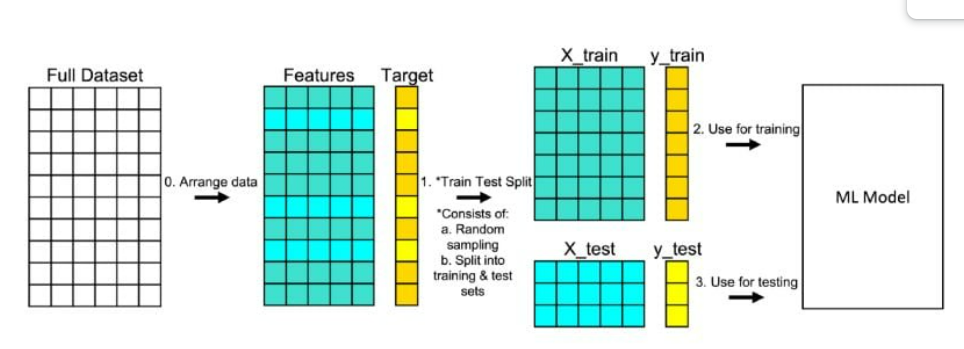

In [ ]:
# pembuatan model dan spliting data untuk algoritma FKNN
from sklearn.model_selection import train_test_split
##### Spliting DataErase
ind_col = [col for col in dfErase.columns if col != 'class']
dep_col = 'class'

X = dfErase[ind_col]
y = dfErase[dep_col]

# Split the data menjadi 20% uji dan 80% train
dfErase, dfTestErase, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
classData = y_train


##### Splitting DataNotErase
indne_col = [col for col in df.columns if col != 'class']
depne_col = 'class'

X2 = df[ind_col]
y2 = df[dep_col]

# Split the data menjadi 20% uji dan 80% train for DataErase
dfErase, dfTestErase, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
classData = y_train

# Split the data menjadi 20% uji dan 80% train for DataErase
df, dfTest, y_trainNE, y_testNE = train_test_split(X2, y2, test_size = 0.20, random_state = 0)
classDataNE = y_trainNE

# FKNN


---





menghitung jarak euclidan

In [ ]:
from scipy.spatial import distance
from sklearn.metrics import pairwise


# menghitung data euclidean
dist = pairwise.euclidean_distances(dfTestErase, dfErase)
dist2 = pairwise.euclidean_distances(dfTest, df)

In [ ]:
# tranpos DataErase agar datanya mudah diolah
euclidandf = pd.DataFrame(dist)
euclidanTranspos = euclidandf.T
euclidanTranspos = euclidanTranspos.set_index(classData.index)

# tranpos DataNotErase agar datanya mudah diolah
euclidandf = pd.DataFrame(dist2)
euclidanTransposNE = euclidandf.T
euclidanTransposNE = euclidanTransposNE.set_index(classDataNE.index)

for col in euclidanTranspos:
  euclidanTranspos.insert(euclidanTranspos.columns.get_loc(col) + 1, 'class ' + str(col), classData)
display(euclidanTranspos)

for col in euclidanTransposNE:
  euclidanTransposNE.insert(euclidanTransposNE.columns.get_loc(col) + 1, 'class ' + str(col), classDataNE)
# per 2 kolom merupakan hasil dari jarak euclidean dan class dari data uji ke data latih

,0,class 0,1,class 1,2,class 2,3,class 3,4,class 4,...,40,class 40,41,class 41,42,class 42,43,class 43,44,class 44
34,0.338660,0,0.651322,0,0.605093,0,0.192845,0,1.515810,0,...,1.100452,0,0.171423,0,1.544189,0,2.604387,0,1.564492,0
160,3.133810,1,3.207808,1,3.202736,1,3.152245,1,3.018583,1,...,2.983677,1,3.138129,1,3.035998,1,2.091603,1,2.708253,1
190,0.211876,0,0.308313,0,0.281857,0,0.375467,0,1.552036,0,...,1.054049,0,0.442384,0,1.612232,0,2.653554,0,1.602619,0
203,2.032052,1,2.121205,1,2.122438,1,1.966823,1,2.323224,1,...,1.721399,1,1.956089,1,2.283428,1,2.326205,1,1.522846,1
121,0.324973,0,0.566065,0,0.478802,0,0.273186,0,1.622402,0,...,1.104472,0,0.304291,0,1.666967,0,2.695717,0,1.595057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.890743,1,1.068084,1,0.828849,1,0.768528,1,1.519198,1,...,1.361649,1,0.791924,1,1.563126,1,2.664485,1,1.689617,1
197,1.204601,1,1.347728,1,1.265766,1,1.217624,1,1.853412,1,...,1.617668,1,1.214902,1,1.907180,1,2.341316,1,1.150820,1
120,2.021039,1,2.122980,1,2.096112,1,2.029190,1,2.461269,1,...,2.264701,1,2.038927,1,2.463984,1,2.380282,1,1.436932,1
48,1.379681,1,1.495291,1,1.492947,1,1.335438,1,1.855922,1,...,1.675416,1,1.313737,1,1.840088,1,2.240289,1,1.950830,1


In [ ]:
# membagi data menjadi 2 column
num_cols = 2

new_dfs = []
new_dfs2 = []
# Iterate over the columns in steps of 2 in DataErase
for i in range(0, len(euclidanTranspos.columns), num_cols):
    # Slice the DataFrame to get the current 2 columns
    new_df = euclidanTranspos.iloc[:, i:i+num_cols]
    # Sort the new DataFrame by the values in the first column
    new_df = new_df.sort_values(by=new_df.columns[0])
    # get  5 data pertama
    new_df = new_df.iloc[:5]
    # Add the new DataFrame to the list
    new_dfs.append(new_df)

# Iterate over the columns in steps of 2 in DataNotErase
for i in range(0, len(euclidanTransposNE.columns), num_cols):
    # Slice the DataFrame to get the current 2 columns
    new_df2 = euclidanTransposNE.iloc[:, i:i+num_cols]
    # Sort the new DataFrame by the values in the first column
    new_df2 = new_df2.sort_values(by=new_df2.columns[0])
    # get  5 data pertama
    new_df2 = new_df2.iloc[:5]
    # Add the new DataFrame to the list
    new_dfs2.append(new_df2)

# Print DataFrames DataErase
for i, new_df in enumerate(new_dfs):
    print(f"New DataFrame {i}:")
    # new_df = new_df.sort_values(by=new_df.columns[0])
    display(new_df)
    print()
# dari jarak perhitungan tersebut data dipisah tiap data uji menjadi 1 dataframe yang berisikan 5 jarak terkecil euclidean data uji
# ke masing masing data train beserta kelasnya

New DataFrame 0:


,0,class 0
139,0.047942,0
96,0.148413,0
132,0.189318,0
147,0.195916,0
62,0.197523,0



New DataFrame 1:


,1,class 1
187,0.047352,0
63,0.149356,0
32,0.158764,0
61,0.204854,0
82,0.271741,0



New DataFrame 2:


,2,class 2
225,0.098206,0
83,0.118690,0
79,0.157202,0
61,0.186761,0
22,0.206350,0



New DataFrame 3:


,3,class 3
174,0.084684,0
27,0.181058,0
81,0.185752,0
34,0.192845,0
194,0.214334,0



New DataFrame 4:


,4,class 4
49,0.632080,1
39,1.065246,1
6,1.110427,1
37,1.122850,1
66,1.184913,1



New DataFrame 5:


,5,class 5
55,0.410708,1
94,0.462243,1
117,1.088284,1
182,1.111223,1
168,1.111454,1



New DataFrame 6:


,6,class 6
42,1.061570,1
58,1.091902,1
176,1.312137,1
10,1.405008,1
156,1.488422,1



New DataFrame 7:


,7,class 7
152,1.203017,1
124,1.237229,1
219,1.326465,1
140,1.493815,1
198,1.500595,1



New DataFrame 8:


,8,class 8
69,0.104360,0
153,0.157582,0
167,0.161830,0
185,0.163642,0
173,0.174996,0



New DataFrame 9:


,9,class 9
226,0.051960,0
188,0.093157,0
54,0.108634,0
220,0.117119,0
210,0.126847,0



New DataFrame 10:


,10,class 10
222,0.045406,0
122,0.070063,0
172,0.091388,0
135,0.097180,0
163,0.106753,0



New DataFrame 11:


,11,class 11
34,0.123001,0
73,0.195375,0
218,0.198139,0
33,0.209896,0
151,0.223919,0



New DataFrame 12:


,12,class 12
61,0.087362,0
62,0.160334,0
83,0.162176,0
79,0.165044,0
211,0.167314,0



New DataFrame 13:


,13,class 13
218,0.104064,0
81,0.138043,0
78,0.163143,0
34,0.181085,0
46,0.225653,0



New DataFrame 14:


,14,class 14
225,0.120991,0
83,0.137476,0
79,0.172061,0
22,0.191523,0
61,0.206632,0



New DataFrame 15:


,15,class 15
22,0.134824,0
79,0.194357,0
83,0.220447,0
225,0.242115,0
26,0.270121,0



New DataFrame 16:


,16,class 16
71,0.473676,1
197,0.750037,1
131,0.931107,1
17,1.005558,1
102,1.167899,1



New DataFrame 17:


,17,class 17
55,0.917589,1
94,0.921918,1
101,1.090493,1
224,1.166909,1
47,1.209097,1



New DataFrame 18:


,18,class 18
27,0.094678,0
174,0.145702,0
183,0.172406,0
194,0.185234,0
210,0.211650,0



New DataFrame 19:


,19,class 19
86,1.488374,1
201,1.518189,1
157,1.555529,1
21,1.558758,1
123,1.559106,1



New DataFrame 20:


,20,class 20
198,1.103959,1
21,1.159302,1
101,1.167835,1
93,1.233486,1
47,1.237983,1



New DataFrame 21:


,21,class 21
60,0.097727,0
167,0.138032,0
212,0.195154,0
46,0.220727,0
36,0.225170,0



New DataFrame 22:


,22,class 22
225,0.158268,0
213,0.176719,0
82,0.178120,0
147,0.185213,0
79,0.187929,0



New DataFrame 23:


,23,class 23
189,0.554461,1
134,1.112693,1
50,1.150351,1
137,1.159989,1
184,1.180628,1



New DataFrame 24:


,24,class 24
187,0.124747,0
63,0.129960,0
61,0.169969,0
82,0.181441,0
32,0.186612,0



New DataFrame 25:


,25,class 25
137,1.554003,1
221,1.667945,1
142,1.677288,1
189,1.768364,1
12,1.786423,1



New DataFrame 26:


,26,class 26
102,0.402983,1
131,1.109405,1
189,1.131140,1
12,1.164896,1
17,1.178258,1



New DataFrame 27:


,27,class 27
172,0.148643,0
206,0.149838,0
22,0.160920,0
83,0.175239,0
147,0.175350,0



New DataFrame 28:


,28,class 28
36,0.086280,0
212,0.090215,0
130,0.177848,0
185,0.182239,0
167,0.193084,0



New DataFrame 29:


,29,class 29
22,0.150556,0
59,0.174528,0
211,0.175070,0
1,0.202615,0
206,0.220662,0



New DataFrame 30:


,30,class 30
88,0.162031,0
73,0.165054,0
14,0.187761,0
194,0.191623,0
174,0.198726,0



New DataFrame 31:


,31,class 31
47,0.326221,1
93,0.535718,1
101,0.895251,1
53,0.996925,1
94,1.053770,1



New DataFrame 32:


,32,class 32
63,0.112222,0
211,0.127955,0
61,0.160522,0
80,0.160539,0
62,0.188225,0



New DataFrame 33:


,33,class 33
22,0.111448,0
206,0.123851,0
79,0.226266,0
172,0.236265,0
83,0.240940,0



New DataFrame 34:


,34,class 34
147,0.098551,0
172,0.123836,0
206,0.134558,0
213,0.140169,0
122,0.177486,0



New DataFrame 35:


,35,class 35
136,0.078419,0
130,0.102733,0
212,0.178961,0
36,0.179896,0
81,0.188396,0



New DataFrame 36:


,36,class 36
132,0.106126,0
62,0.177354,0
82,0.190238,0
190,0.207121,0
80,0.224789,0



New DataFrame 37:


,37,class 37
132,0.148965,0
139,0.189367,0
96,0.192419,0
190,0.212803,0
99,0.224589,0



New DataFrame 38:


,38,class 38
48,1.051963,1
103,1.111306,1
189,1.123822,1
43,1.264758,1
50,1.423004,1



New DataFrame 39:


,39,class 39
61,0.213303,0
22,0.218123,0
211,0.224719,0
225,0.235483,0
63,0.239139,0



New DataFrame 40:


,40,class 40
129,0.541667,1
167,1.004861,0
60,1.007950,0
212,1.009034,0
36,1.014067,0



New DataFrame 41:


,41,class 41
34,0.171423,0
33,0.173289,0
216,0.180657,0
151,0.186719,0
174,0.197149,0



New DataFrame 42:


,42,class 42
189,1.103304,1
165,1.436409,1
159,1.438144,1
11,1.448228,1
15,1.453555,1



New DataFrame 43:


,43,class 43
40,1.138204,1
152,1.139761,1
158,1.153605,1
219,1.163143,1
110,1.410366,1



New DataFrame 44:


,44,class 44
85,0.682192,1
182,0.830892,1
104,0.861535,1
168,0.998416,1
224,1.016036,1


In [ ]:
# setelah 5 jarak euclidean tiap data uji didapatkan
# lalu kami bisa membuat nilai keanggotaan untuk masing masing klasifikasi

for i, new_df in enumerate(new_dfs):
    new_df['keanggotaan class 0'] = new_df.apply(lambda row: 0 if (row['class '+ str(i)] == 1 ) else 1, axis=1)
    new_df['keanggotaan class 1'] = new_df.apply(lambda row: 1 if (row['class '+ str(i)] == 1 ) else 0, axis=1)
    display(new_df)

for i, new_df2 in enumerate(new_dfs):
    new_df2['keanggotaan class 0'] = new_df2.apply(lambda row: 0 if (row['class '+ str(i)] == 1 ) else 1, axis=1)
    new_df2['keanggotaan class 1'] = new_df2.apply(lambda row: 1 if (row['class '+ str(i)] == 1 ) else 0, axis=1)


,0,class 0,keanggotaan class 0,keanggotaan class 1
139,0.047942,0,1,0
96,0.148413,0,1,0
132,0.189318,0,1,0
147,0.195916,0,1,0
62,0.197523,0,1,0


,1,class 1,keanggotaan class 0,keanggotaan class 1
187,0.047352,0,1,0
63,0.149356,0,1,0
32,0.158764,0,1,0
61,0.204854,0,1,0
82,0.271741,0,1,0


,2,class 2,keanggotaan class 0,keanggotaan class 1
225,0.098206,0,1,0
83,0.118690,0,1,0
79,0.157202,0,1,0
61,0.186761,0,1,0
22,0.206350,0,1,0


,3,class 3,keanggotaan class 0,keanggotaan class 1
174,0.084684,0,1,0
27,0.181058,0,1,0
81,0.185752,0,1,0
34,0.192845,0,1,0
194,0.214334,0,1,0


,4,class 4,keanggotaan class 0,keanggotaan class 1
49,0.632080,1,0,1
39,1.065246,1,0,1
6,1.110427,1,0,1
37,1.122850,1,0,1
66,1.184913,1,0,1


,5,class 5,keanggotaan class 0,keanggotaan class 1
55,0.410708,1,0,1
94,0.462243,1,0,1
117,1.088284,1,0,1
182,1.111223,1,0,1
168,1.111454,1,0,1


,6,class 6,keanggotaan class 0,keanggotaan class 1
42,1.061570,1,0,1
58,1.091902,1,0,1
176,1.312137,1,0,1
10,1.405008,1,0,1
156,1.488422,1,0,1


,7,class 7,keanggotaan class 0,keanggotaan class 1
152,1.203017,1,0,1
124,1.237229,1,0,1
219,1.326465,1,0,1
140,1.493815,1,0,1
198,1.500595,1,0,1


,8,class 8,keanggotaan class 0,keanggotaan class 1
69,0.104360,0,1,0
153,0.157582,0,1,0
167,0.161830,0,1,0
185,0.163642,0,1,0
173,0.174996,0,1,0


,9,class 9,keanggotaan class 0,keanggotaan class 1
226,0.051960,0,1,0
188,0.093157,0,1,0
54,0.108634,0,1,0
220,0.117119,0,1,0
210,0.126847,0,1,0


,10,class 10,keanggotaan class 0,keanggotaan class 1
222,0.045406,0,1,0
122,0.070063,0,1,0
172,0.091388,0,1,0
135,0.097180,0,1,0
163,0.106753,0,1,0


,11,class 11,keanggotaan class 0,keanggotaan class 1
34,0.123001,0,1,0
73,0.195375,0,1,0
218,0.198139,0,1,0
33,0.209896,0,1,0
151,0.223919,0,1,0


,12,class 12,keanggotaan class 0,keanggotaan class 1
61,0.087362,0,1,0
62,0.160334,0,1,0
83,0.162176,0,1,0
79,0.165044,0,1,0
211,0.167314,0,1,0


,13,class 13,keanggotaan class 0,keanggotaan class 1
218,0.104064,0,1,0
81,0.138043,0,1,0
78,0.163143,0,1,0
34,0.181085,0,1,0
46,0.225653,0,1,0


,14,class 14,keanggotaan class 0,keanggotaan class 1
225,0.120991,0,1,0
83,0.137476,0,1,0
79,0.172061,0,1,0
22,0.191523,0,1,0
61,0.206632,0,1,0


,15,class 15,keanggotaan class 0,keanggotaan class 1
22,0.134824,0,1,0
79,0.194357,0,1,0
83,0.220447,0,1,0
225,0.242115,0,1,0
26,0.270121,0,1,0


,16,class 16,keanggotaan class 0,keanggotaan class 1
71,0.473676,1,0,1
197,0.750037,1,0,1
131,0.931107,1,0,1
17,1.005558,1,0,1
102,1.167899,1,0,1


,17,class 17,keanggotaan class 0,keanggotaan class 1
55,0.917589,1,0,1
94,0.921918,1,0,1
101,1.090493,1,0,1
224,1.166909,1,0,1
47,1.209097,1,0,1


,18,class 18,keanggotaan class 0,keanggotaan class 1
27,0.094678,0,1,0
174,0.145702,0,1,0
183,0.172406,0,1,0
194,0.185234,0,1,0
210,0.211650,0,1,0


,19,class 19,keanggotaan class 0,keanggotaan class 1
86,1.488374,1,0,1
201,1.518189,1,0,1
157,1.555529,1,0,1
21,1.558758,1,0,1
123,1.559106,1,0,1


,20,class 20,keanggotaan class 0,keanggotaan class 1
198,1.103959,1,0,1
21,1.159302,1,0,1
101,1.167835,1,0,1
93,1.233486,1,0,1
47,1.237983,1,0,1


,21,class 21,keanggotaan class 0,keanggotaan class 1
60,0.097727,0,1,0
167,0.138032,0,1,0
212,0.195154,0,1,0
46,0.220727,0,1,0
36,0.225170,0,1,0


,22,class 22,keanggotaan class 0,keanggotaan class 1
225,0.158268,0,1,0
213,0.176719,0,1,0
82,0.178120,0,1,0
147,0.185213,0,1,0
79,0.187929,0,1,0


,23,class 23,keanggotaan class 0,keanggotaan class 1
189,0.554461,1,0,1
134,1.112693,1,0,1
50,1.150351,1,0,1
137,1.159989,1,0,1
184,1.180628,1,0,1


,24,class 24,keanggotaan class 0,keanggotaan class 1
187,0.124747,0,1,0
63,0.129960,0,1,0
61,0.169969,0,1,0
82,0.181441,0,1,0
32,0.186612,0,1,0


,25,class 25,keanggotaan class 0,keanggotaan class 1
137,1.554003,1,0,1
221,1.667945,1,0,1
142,1.677288,1,0,1
189,1.768364,1,0,1
12,1.786423,1,0,1


,26,class 26,keanggotaan class 0,keanggotaan class 1
102,0.402983,1,0,1
131,1.109405,1,0,1
189,1.131140,1,0,1
12,1.164896,1,0,1
17,1.178258,1,0,1


,27,class 27,keanggotaan class 0,keanggotaan class 1
172,0.148643,0,1,0
206,0.149838,0,1,0
22,0.160920,0,1,0
83,0.175239,0,1,0
147,0.175350,0,1,0


,28,class 28,keanggotaan class 0,keanggotaan class 1
36,0.086280,0,1,0
212,0.090215,0,1,0
130,0.177848,0,1,0
185,0.182239,0,1,0
167,0.193084,0,1,0


,29,class 29,keanggotaan class 0,keanggotaan class 1
22,0.150556,0,1,0
59,0.174528,0,1,0
211,0.175070,0,1,0
1,0.202615,0,1,0
206,0.220662,0,1,0


,30,class 30,keanggotaan class 0,keanggotaan class 1
88,0.162031,0,1,0
73,0.165054,0,1,0
14,0.187761,0,1,0
194,0.191623,0,1,0
174,0.198726,0,1,0


,31,class 31,keanggotaan class 0,keanggotaan class 1
47,0.326221,1,0,1
93,0.535718,1,0,1
101,0.895251,1,0,1
53,0.996925,1,0,1
94,1.053770,1,0,1


,32,class 32,keanggotaan class 0,keanggotaan class 1
63,0.112222,0,1,0
211,0.127955,0,1,0
61,0.160522,0,1,0
80,0.160539,0,1,0
62,0.188225,0,1,0


,33,class 33,keanggotaan class 0,keanggotaan class 1
22,0.111448,0,1,0
206,0.123851,0,1,0
79,0.226266,0,1,0
172,0.236265,0,1,0
83,0.240940,0,1,0


,34,class 34,keanggotaan class 0,keanggotaan class 1
147,0.098551,0,1,0
172,0.123836,0,1,0
206,0.134558,0,1,0
213,0.140169,0,1,0
122,0.177486,0,1,0


,35,class 35,keanggotaan class 0,keanggotaan class 1
136,0.078419,0,1,0
130,0.102733,0,1,0
212,0.178961,0,1,0
36,0.179896,0,1,0
81,0.188396,0,1,0


,36,class 36,keanggotaan class 0,keanggotaan class 1
132,0.106126,0,1,0
62,0.177354,0,1,0
82,0.190238,0,1,0
190,0.207121,0,1,0
80,0.224789,0,1,0


,37,class 37,keanggotaan class 0,keanggotaan class 1
132,0.148965,0,1,0
139,0.189367,0,1,0
96,0.192419,0,1,0
190,0.212803,0,1,0
99,0.224589,0,1,0


,38,class 38,keanggotaan class 0,keanggotaan class 1
48,1.051963,1,0,1
103,1.111306,1,0,1
189,1.123822,1,0,1
43,1.264758,1,0,1
50,1.423004,1,0,1


,39,class 39,keanggotaan class 0,keanggotaan class 1
61,0.213303,0,1,0
22,0.218123,0,1,0
211,0.224719,0,1,0
225,0.235483,0,1,0
63,0.239139,0,1,0


,40,class 40,keanggotaan class 0,keanggotaan class 1
129,0.541667,1,0,1
167,1.004861,0,1,0
60,1.007950,0,1,0
212,1.009034,0,1,0
36,1.014067,0,1,0


,41,class 41,keanggotaan class 0,keanggotaan class 1
34,0.171423,0,1,0
33,0.173289,0,1,0
216,0.180657,0,1,0
151,0.186719,0,1,0
174,0.197149,0,1,0


,42,class 42,keanggotaan class 0,keanggotaan class 1
189,1.103304,1,0,1
165,1.436409,1,0,1
159,1.438144,1,0,1
11,1.448228,1,0,1
15,1.453555,1,0,1


,43,class 43,keanggotaan class 0,keanggotaan class 1
40,1.138204,1,0,1
152,1.139761,1,0,1
158,1.153605,1,0,1
219,1.163143,1,0,1
110,1.410366,1,0,1


,44,class 44,keanggotaan class 0,keanggotaan class 1
85,0.682192,1,0,1
182,0.830892,1,0,1
104,0.861535,1,0,1
168,0.998416,1,0,1
224,1.016036,1,0,1


# memulai perhitungan fknn

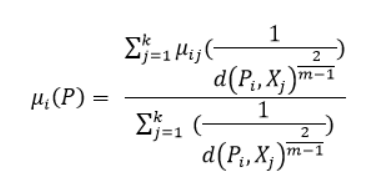

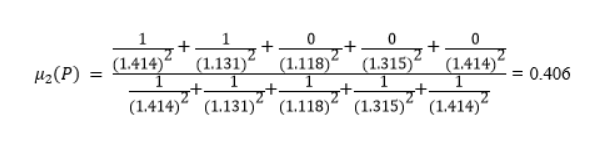

In [ ]:
# diasumsikan m == 2
# karena kami hanya memiliki 2 kelas untuk hasil prediksi maka kami hanya menghitung besaran nilai data uji
# untuk masing masing kelas

hasilClass = []
hasilClass2 = []

# fungsi knn for DataErase
for i, new_df in enumerate(new_dfs):
  fknnAtas1 = ((new_df.iloc[0,2]/(new_df.iloc[0,0]**2))+(new_df.iloc[1,2]/(new_df.iloc[1,0]**2))+(new_df.iloc[2,2]/(new_df.iloc[2,0]**2))+(new_df.iloc[3,2]/(new_df.iloc[3,0]**2))+(new_df.iloc[4,2]/(new_df.iloc[4,0]**2)))
  fknnBawah1 = ((1/(new_df.iloc[0,0]**2))+(1/(new_df.iloc[1,0]**2))+(1/(new_df.iloc[2,0]**2))+(1/(new_df.iloc[3,0]**2))+(1/(new_df.iloc[4,0]**2)))

  fknnAtas2 = ((new_df.iloc[0,3]/(new_df.iloc[0,0]**2))+(new_df.iloc[1,3]/(new_df.iloc[1,0]**2))+(new_df.iloc[2,3]/(new_df.iloc[2,0]**2))+(new_df.iloc[3,3]/(new_df.iloc[3,0]**2))+(new_df.iloc[4,3]/(new_df.iloc[4,0]**2)))
  fknnBawah2 = ((1/(new_df.iloc[0,0]**2))+(1/(new_df.iloc[1,0]**2))+(1/(new_df.iloc[2,0]**2))+(1/(new_df.iloc[3,0]**2))+(1/(new_df.iloc[4,0]**2)))


  hasilC0 = (fknnAtas1/fknnBawah1)
  hasilC1 = (fknnAtas2/fknnBawah2)

  hasilClass.append([hasilC0,hasilC1])

# fungsi knn for DataNotErase
for i, new_df in enumerate(new_dfs2):
  fknnAtas1NE = ((new_df2.iloc[0,2]/(new_df2.iloc[0,0]**2))+(new_df2.iloc[1,2]/(new_df2.iloc[1,0]**2))+(new_df2.iloc[2,2]/(new_df2.iloc[2,0]**2))+(new_df2.iloc[3,2]/(new_df2.iloc[3,0]**2))+(new_df2.iloc[4,2]/(new_df2.iloc[4,0]**2)))
  fknnBawah1NE = ((1/(new_df2.iloc[0,0]**2))+(1/(new_df2.iloc[1,0]**2))+(1/(new_df2.iloc[2,0]**2))+(1/(new_df2.iloc[3,0]**2))+(1/(new_df2.iloc[4,0]**2)))

  fknnAtas2NE = ((new_df2.iloc[0,3]/(new_df2.iloc[0,0]**2))+(new_df2.iloc[1,3]/(new_df2.iloc[1,0]**2))+(new_df2.iloc[2,3]/(new_df2.iloc[2,0]**2))+(new_df2.iloc[3,3]/(new_df2.iloc[3,0]**2))+(new_df2.iloc[4,3]/(new_df2.iloc[4,0]**2)))
  fknnBawah2NE = ((1/(new_df2.iloc[0,0]**2))+(1/(new_df2.iloc[1,0]**2))+(1/(new_df2.iloc[2,0]**2))+(1/(new_df2.iloc[3,0]**2))+(1/(new_df2.iloc[4,0]**2)))


  hasilC0NE = (fknnAtas1NE/fknnBawah1NE)
  hasilC1NE = (fknnAtas2NE/fknnBawah2NE)

  hasilClass2.append([hasilC0NE,hasilC1NE])

# display hasil kelas untuk masing masing data uji
hasilClass = pd.DataFrame(hasilClass, columns=['hasil class 0', 'hasil class 1'])
hasilClass2 = pd.DataFrame(hasilClass2, columns=['hasil class 0', 'hasil class 1'])

display(hasilClass)


,hasil class 0,hasil class 1
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,1.000000,0.000000
9,1.000000,0.000000


In [ ]:
hasilPred = []
hasilPredNE = []
# membandingkan hasil nilai kelas untuk prediksi
# jika hasil nilai kelas cenderung ke salah satu kelas maka itu adalah hasil prediksi
for i in range(len(hasilClass)):
    if hasilClass.iloc[i,0] > hasilClass.iloc[i,1]:
      hasilPred.append(0)
    else:
      hasilPred.append(1)

for i in range(len(hasilClass2)):
    if hasilClass2.iloc[i,0] > hasilClass2.iloc[i,1]:
      hasilPredNE.append(0)
    else:
      hasilPredNE.append(1)
print(hasilPred)

[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [ ]:
# menggabungkan data uji dengan hasil prediksi
y_pred = pd.DataFrame({'class': hasilPred})
hasilPred = pd.DataFrame({'class': hasilPred})
dfTestErase.index = hasilPred.index
dfHasil = pd.concat([dfTestErase, hasilPred], axis=1)

y_predNE = pd.DataFrame({'class': hasilPredNE})
hasilPredNE = pd.DataFrame({'class': hasilPredNE})
dfTest.index = hasilPredNE.index
dfHasilNE = pd.concat([dfTest, hasilPredNE], axis=1)
display(dfHasil)

,age,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,0.647727,0.285714,1.00,0.00,0.0,1,0,0,0.142857,0.140097,0.012712,0.647541,0,0,0,0,0,0,0
1,0.204545,0.142857,1.00,0.00,0.0,1,0,0,0.069048,0.043478,0.033898,0.688525,0,0,0,0,0,0,0
2,0.261364,0.428571,1.00,0.00,0.0,1,0,0,0.121429,0.043478,0.033898,0.770492,0,0,0,0,0,0,0
3,0.659091,0.285714,0.75,0.00,0.0,1,0,0,0.069048,0.043478,0.033898,0.885246,0,0,0,0,0,0,0
4,0.579545,0.571429,0.50,0.00,0.0,1,0,0,0.069048,0.135266,0.076271,0.434426,0,0,0,1,0,1,1
5,0.670455,0.571429,0.25,0.25,0.2,1,0,0,0.211905,0.140097,0.046610,0.467213,1,1,0,1,0,0,1
6,0.443182,0.428571,0.50,0.25,0.8,1,0,0,0.333333,0.748792,0.745763,0.770492,0,1,0,0,0,0,1
7,0.693182,0.285714,0.25,0.75,0.0,0,1,0,0.738095,0.241546,0.097458,0.426230,1,1,0,1,1,0,1
8,0.306818,0.285714,0.75,0.00,0.0,1,0,0,0.135714,0.164251,0.033898,0.754098,0,0,0,0,0,0,0
9,0.454545,0.428571,0.75,0.00,0.0,1,0,0,0.066667,0.048309,0.004237,0.680328,0,0,0,0,0,0,0


# implementasi

In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrixNE = confusion_matrix(y_testNE, y_predNE)

# Mendapatkan nilai True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN)
TP = conf_matrix[1, 1]  # Prediksi positive yang benar (TP)
TN = conf_matrix[0, 0]  # Prediksi negative yang benar (TN)
FN = conf_matrix[0, 1]  # Prediksi positive yang seharusnya negative (FP)
FP = conf_matrix[1, 0]  # Prediksi negative yang seharusnya positive (FN)
#
TPNE = conf_matrixNE[1, 1]  # Prediksi positive yang benar
TNNE = conf_matrixNE[0, 0]  # Prediksi negative yang benar
FPNE = conf_matrixNE[0, 1]  # Prediksi positive yang seharusnya negative
FNNE = conf_matrixNE[1, 0]  # Prediksi negative yang seharusnya positive


# Membuat DataFrame untuk menampilkan hasil
data = {'Actual Positive': [TP, FN],
        'Actual Negative': [FP, TN]}
df_conf_matrix = pd.DataFrame(data, index=['Predicted Positive', 'Predicted Negative'])
#
dataNE = {'Actual Positive': [TPNE, FNNE],
        'Actual Negative': [FPNE, TNNE]}
df_conf_matrixNE = pd.DataFrame(dataNE, index=['Predicted Positive', 'Predicted Negative'])


# Menampilkan tabel confusion matrix
print("Confusion Matrix:")
display(df_conf_matrix)
print('\n')
print("Confusion Matrix Tanpa Seleksi Fitur")
display(df_conf_matrixNE)

Confusion Matrix:


,Actual Positive,Actual Negative
Predicted Positive,16,1
Predicted Negative,0,28




Confusion Matrix Tanpa Seleksi Fitur


,Actual Positive,Actual Negative
Predicted Positive,31,25
Predicted Negative,0,0


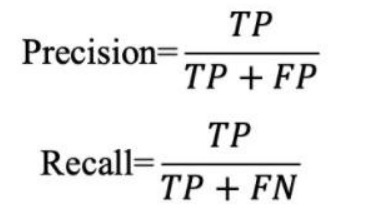

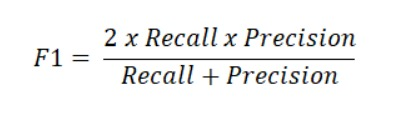

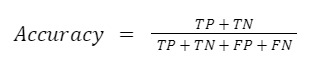

In [ ]:
# Perbandingan antara menggunakan seleks fitur dan tanpa menggunakan seleksi fitur
# library yang digunakan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import zscore

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracyNE = accuracy_score(y_testNE, y_predNE)
# Precision
precision = precision_score(y_test, y_pred)
precisionNE = precision_score(y_testNE, y_predNE)
# Recall
recall = recall_score(y_test, y_pred)
recallNE = recall_score(y_testNE, y_predNE)
# F1 Score
f1 = f1_score(y_test, y_pred)
f1NE = f1_score(y_testNE, y_predNE)

print("=======Menggunakan Seleksi Data======")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)
print()
print()
print("=======Tanpa Menggunakan Seleksi Data======")
print("Accuracy:", accuracyNE)
print("Precision:", precisionNE)
print("Recall:", recallNE)
print("F1 Score:",f1NE)
print()

=======Menggunakan Seleksi Data======
Accuracy: 0.9777777777777777
Precision: 1.0
Recall: 0.9411764705882353
F1 Score: 0.9696969696969697


=======Tanpa Menggunakan Seleksi Data======
Accuracy: 0.5535714285714286
Precision: 0.5535714285714286
Recall: 1.0
F1 Score: 0.7126436781609196

